In [30]:
import numpy as np
import pandas as pd
import utils as utils
from Levenshtein import distance
import matplotlib.pyplot as plt
from clustering import Clustering
from strand_reconstruction import align
from tqdm import tqdm
from strand_reconstruction import make_prediction

## 3.5 Seconds coupling time

Full circle sequencing run of 150nt KB synthesis with lower coupling time of 3.5s and no capping. First and last 20nt have normal coupling time to ensure primers are accurate. The sample has been PCR amplified. 

In [2]:
records_1 = utils.get_fastq_records(fastq_filepath=r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\low_coupling_rate\3_5\3_5\3_5.fastq\3_5.fastq")

135319it [00:03, 41203.78it/s]


In [3]:
records_2 = utils.get_fastq_records(r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\low_coupling_rate\4_5\4_5\4_5.fastq\4_5.fastq")

388581it [00:09, 41094.40it/s]


In [7]:
original_strand = "AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTT"

In [8]:
strands_1 = [str(i.seq) for i in records_2]

In [17]:
strands_1 = [i[20:-20] for i in strands_1 if len(i) < 140]

Text(0.5, 1.0, 'Original distribution of strand lengths for 4.5s coupling time')

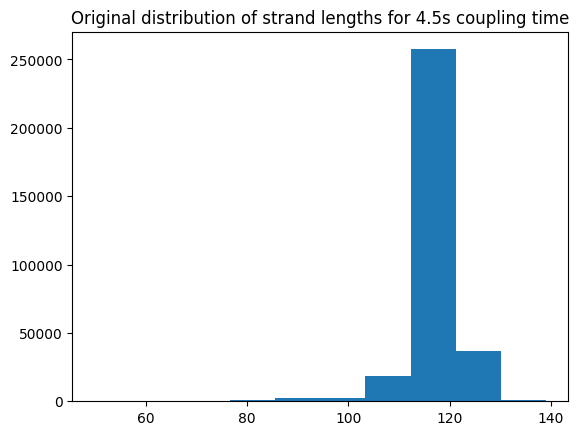

In [12]:
plt.hist([len(i) for i in strands_1])
plt.title("Original distribution of strand lengths for 4.5s coupling time")

In [18]:
t = Clustering(strand_pool=strands_1[:10000], reference_length=70)

In [20]:
t.cluster_strand_pool(distance_threshold=5)

Total strands 10000


100%|██████████| 10000/10000 [01:19<00:00, 125.98it/s]

Number of clusters = 6681
Clusters are sorted
Orientation fixed in the strand pool


[['TTCACCAAACCTCCTAACAATAATTATCCCAAACATTGATCCTAATACCCACCTAATACATCCATCCAATCTCTCTA',
  'TTCACAAACCTCCTAACAATAATTATCCCAAACATTATCCTAACTACCCACCTAATACATCCATCCAATTCTCTA',
  'TTCACCAAACCTCCTAACAATGAATTATCCAAACATTGATCCTAATACCCACCTAATACATCCATCCAATCGTCTCTA',
  'TTCACCAAGACTCCTAACAATAATTATCCCAAACATTATCCTAACTACCCACCTAATACGATCCATCCAATCTCTCTA',
  'TTCACCAAACCTCTAACAATAATTATCGCCAAACATTATCCTAACTACCCACCTAATACATCCATCCAATCTCTCTA',
  'TTCACCAAGACTCCTAACAATAATTATCCCAAACATTGATCCTAATACGCACCTAATACATCCATGCCAATTCTCTCTA',
  'TTCACCAAGACTCCTAACAATAATTATCCCAAGACATTGATCCTAATACCCACCTAATACATCCATCCAATCTCTCTA',
  'TTCACCAAACCTCCTAACAATAATTATCCCAAACATGTATCCTAACTGACCCACCTAATACATCGATCCAATCTCTCTA',
  'TTCACCAAACCTCCTAACAATAATTATCCCAAACATTGATCCTAACTACCCACCTAATACGATCCATCAATCTCTCTA',
  'TTCACCAAACCTCCTAACAATAATTATGCCCAAACATTGATCTAACTACCCACCTAATACATCCAGTCCAATCTCTCTA',
  'TTCACCAAGACCTCCTAACAATAATTATCCCAAACATTATCCTAATACCCACCTAGATACATCCATCCAATCTCTCTA',
  'TTTCACCAAACCTCCTAACAATAATTATCCCAAACATTATCCTAACTGACCCACCTAATACATCCATCCAATCTC

In [26]:
print(original_strand[20:-20])

TTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGG


(array([6.671e+03, 6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  24.2,  47.4,  70.6,  93.8, 117. , 140.2, 163.4, 186.6,
        209.8, 233. ]),
 <BarContainer object of 10 artists>)

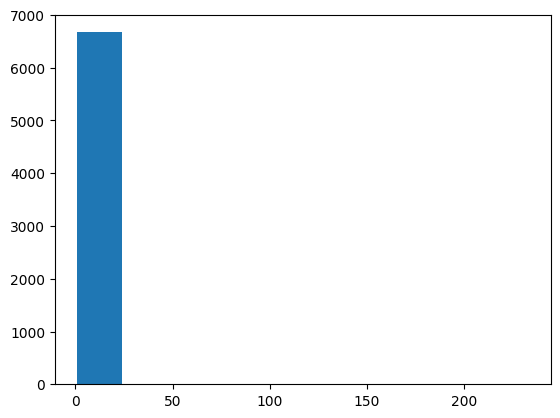

In [35]:
plt.hist([len(i) for i in t.clustered_seqs])

In [34]:
for i in t.clustered_seqs:
    print(len(i))
    s = make_prediction(i, 15)
    #print(align(original_strand[20:-20], s))
    #print(align(utils.reverse_complement(original_strand[20:-20]), s))
    print()

233

114

74

53

45

44

39

34

34

26

24

22

21

21

19

18

18

17

17

17

16

16

16

16

16

15

15

15

15

15

15

14

14

13

13

13

13

12

12

12

12

12

12

12

12

11

11

11

11

11

11

11

10

10

10

10


KeyboardInterrupt: 

In [102]:
from strand_reconstruction import make_prediction, align

distance(make_prediction(t.clustered_seqs[0], sample_size=20), original_strand)

2

In [103]:
len(predicted_strand)

152

In [105]:
predicted_strand = make_prediction(t.clustered_seqs[0], sample_size=15)
print(align(predicted_strand, original_strand))

target            0 TAGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGC
                  0 -|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query             0 -AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGC

target           60 CAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGG
                 60 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query            59 CAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGG

target          120 ATCGTCTCTGGAACGCTCCGAAAGTCTTGTTT 152
                120 |||||||||||||||||||||||||||||||- 152
query           119 ATCGTCTCTGGAACGCTCCGAAAGTCTTGTT- 150



## Testing deletion profiles (without removing sequencing error)

In [38]:
final_strands = []
for s in t.cluster_heads:
    if distance(original_strand[20:-20], s) > distance(utils.reverse_complement(original_strand[20:-20]), s):
        final_strands.append(utils.reverse_complement(s))
    else:
        final_strands.append(s)

In [71]:
final_strands = []
for j in tqdm(t.clustered_seqs):

    prediction = make_prediction(j, 15)
    if distance(original_strand[20:-20], prediction) > distance(utils.reverse_complement(original_strand[20:-20]), prediction):
        final_strands.append(utils.reverse_complement(prediction))
    else:
        final_strands.append(prediction)

100%|██████████| 6681/6681 [02:37<00:00, 42.33it/s]


In [42]:
from bitwise_majority_alignment import reconstruct_dna_strand, bidirectional_alignment

In [79]:
#reconstructed_strand = reconstruct_dna_strand(final_strands, 0.3, 110)
reconstructed_strand = bidirectional_alignment(final_strands, 0.3, 110, 0)

In [80]:
distance(reconstructed_strand, original_strand[20:-20])

51

In [81]:
print(align(original_strand[20:-20], reconstructed_strand))

target            0 TTCAC-CAAGG-A---GG-C-CTCCT-GGA-ACA-A-TG-AATTATGG-CGCC-AAGACA
                  0 |||||-|||---|---|--|-|||-|-|-|-|||-|-|--|||-|||--|----|---||
query             0 TTCACTCAA--CACAAG-ACTCTC-TAG-ACACATAAT-CAAT-ATG-AC---TA---CA

target           46 TGGTGGATCC--T-AACTGGAGCG-C--CGAC--C-TGG-AG-ATACGA-T-C--CGG--
                 60 |-----|||---|-|||||-|-|--|--||||--|-|---||-||||||-|-|--||---
query            46 T-----ATC-AATCAACTG-A-C-ACTACGACTACAT--CAGCATACGACTACATCG-TC

target           89 AGGTGC-CAGGATCGTCTCTGG- 110
                120 |--|-|-|||-|||-|||||--- 143
query            94 A--T-CTCAG-ATC-TCTCT--A 110



In [60]:
print(align(original_strand[20:-20], t.cluster_heads[0]))

target            0 TTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAAC
                  0 ||||||||--|--||||||--||||||-||||||--|-||||-||||--||-|||||||-
query             0 TTCACCAA--A--CCTCCT--AACAAT-AATTAT--C-CCAA-ACAT--TG-ATCCTAA-

target           60 TGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGG- 110
                 60 |--|-|-||-||||--|-||||-||||--|--|-|||--|||-|||||--- 111
query            45 T--A-C-CC-ACCT--A-ATAC-ATCC--A--T-CCA--ATC-TCTCT--A  77



In [95]:
error_by_position = np.zeros(110)
for i in tqdm(final_strands):

    aligned = align(original_strand[20:-20], i)
    positional_error = [aligned.indices[0][ind] for ind, i in enumerate(aligned.indices[1]) if i == -1]

    for i in positional_error:
        error_by_position[i] += 1

 92%|█████████▏| 6174/6681 [02:16<00:11, 45.37it/s]


KeyboardInterrupt: 

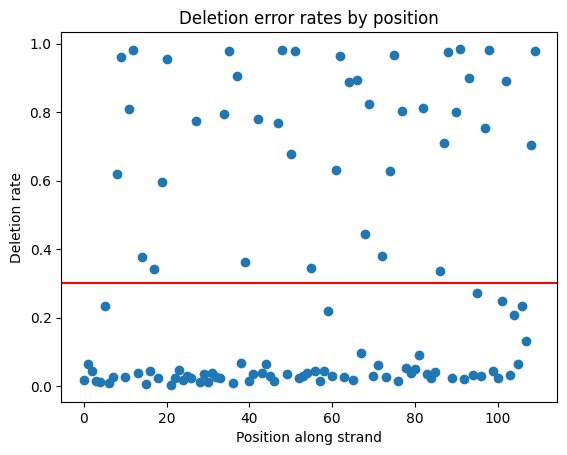

In [102]:
plt.plot(error_by_position/6174, 'o')
plt.title("Deletion error rates by position")
plt.xlabel("Position along strand")
plt.ylabel("Deletion rate")
plt.axhline(0.3, color='r')


In [94]:
positional_error

[np.int64(9),
 np.int64(11),
 np.int64(12),
 np.int64(14),
 np.int64(19),
 np.int64(20),
 np.int64(27),
 np.int64(34),
 np.int64(35),
 np.int64(37),
 np.int64(42),
 np.int64(47),
 np.int64(48),
 np.int64(50),
 np.int64(51),
 np.int64(62),
 np.int64(64),
 np.int64(66),
 np.int64(68),
 np.int64(72),
 np.int64(75),
 np.int64(77),
 np.int64(82),
 np.int64(88),
 np.int64(90),
 np.int64(91),
 np.int64(93),
 np.int64(97),
 np.int64(98),
 np.int64(102),
 np.int64(108),
 np.int64(109)]

## Examining deletion profiles

In [29]:
unique_strand_counter = {}

for i in strands_to_be_clustered:
    if i in unique_strand_counter:
        unique_strand_counter[i] += 1
    else:
        unique_strand_counter[i] = 0

In [31]:
len(unique_strand_counter)

79017

In [32]:
unique_strand_lens = [len(i) for i in unique_strand_counter.keys()]

(array([4.791e+03, 7.241e+04, 8.570e+02, 2.840e+02, 6.000e+02, 5.800e+01,
        1.300e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10. ,  66.7, 123.4, 180.1, 236.8, 293.5, 350.2, 406.9, 463.6,
        520.3, 577. ]),
 <BarContainer object of 10 artists>)

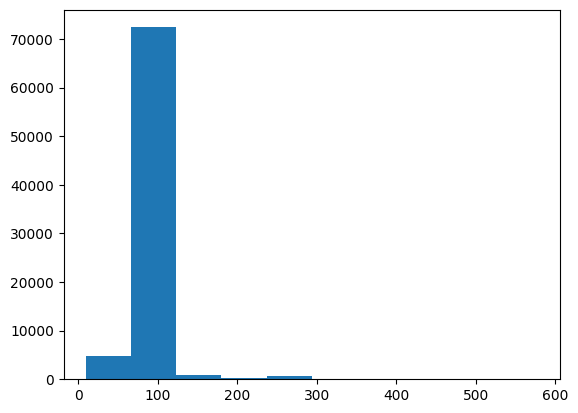

In [34]:
plt.hist(unique_strand_lens)

In [36]:
filtered_strands = [i for i in unique_strand_counter.keys() if len(i) > 70 and len(i) < 110]

(array([2.4645e+04, 2.7000e+02, 1.4500e+02, 1.3000e+02, 5.5000e+01,
        5.9000e+01, 2.1000e+01, 9.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

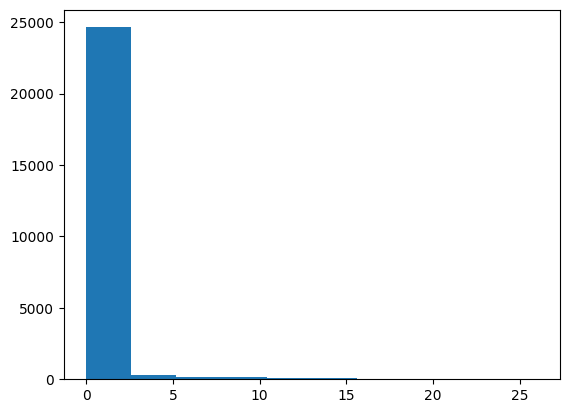

In [38]:
plt.hist([unique_strand_counter[i] for i in filtered_strands])

In [40]:
# Quantifying number of deletions over the profiles
deletions = [110 - len(i) for i in filtered_strands]

Text(0, 0.5, 'Number of deletion profiles')

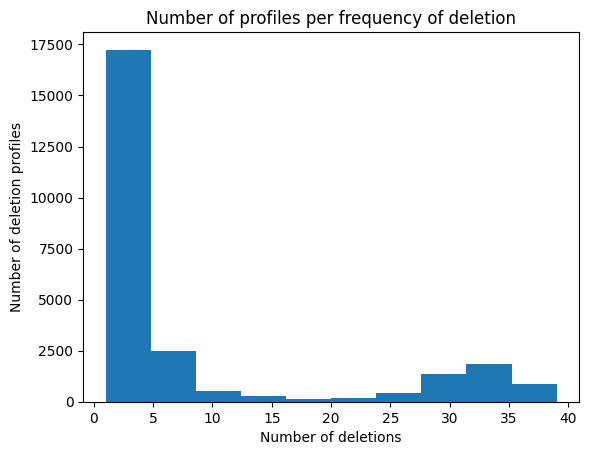

In [43]:
plt.hist(deletions)
plt.title("Number of profiles per frequency of deletion")
plt.xlabel("Number of deletions")
plt.ylabel("Number of deletion profiles")

In [47]:
len(original_strand[20:-20])

110

In [50]:
for i in filtered_strands:
    if len(i) > 100:
        print(distance(i, original_strand[20:-20]))
        print(distance(utils.reverse_complement(i), original_strand[20: -20]))
        print()

59
64

58
57

59
59

61
57

61
61

61
56

56
62

62
63

5
57

56
58

57
59

62
56

64
59

61
58

63
57

57
66

54
61

61
57

58
61

64
60

59
63

61
54

62
59

58
55

56
65

65
61

56
58

56
58

58
58

57
63

61
62

65
59

58
61

62
61

62
63

62
59

60
61

56
60

59
60

62
56

61
58

60
62

65
63

60
53

65
61

59
59

58
57

58
1

60
63

62
57

53
59

56
59

57
4

63
58

64
60

63
57

56
10

65
60

61
61

58
57

58
59

61
63

58
65

60
60

59
57

61
60

58
61

66
66

62
61

63
63

4
55

58
62

7
59

57
59

60
57

60
63

61
60

63
61

63
57

60
62

61
63

59
61

60
3

60
59

56
56

63
62

3
56

63
59

61
58

59
58

58
3

58
8

60
60

61
62

61
61

62
59

64
63

64
61

59
59

62
58

56
60

57
12

60
62

63
61

65
60

61
60

60
61

62
63

61
60

56
62

59
57

64
62

57
60

58
60

63
55

59
52

54
48

63
59

62
9

59
60

61
56

63
57

54
58

60
61

60
58

64
62

59
61

59
58

62
58

58
62

59
62

56
62

60
58

53
56

57
3

59
64

56
58

66
61

59
63

57
62

59
58

60
57

62
60

64
59

60


In [20]:
len(strands[21])

151

## 4.5 seconds coupling time

Same strand, 4.5 seconds coupling time